In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi']=300

__1. LOAD DATASET__

In [2]:
mpg = sns.load_dataset('mpg')

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
features=mpg[['horsepower','weight','displacement']]

In [5]:
target=mpg['mpg']

In [6]:
target.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [7]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [10]:
print(type(features))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(type(target))

<class 'pandas.core.series.Series'>


In [12]:
features.shape

(398, 3)

In [13]:
target.shape

(398,)

In [15]:
features.isna().sum()

horsepower      6
weight          0
displacement    0
dtype: int64

In [18]:
features.fillna(0,inplace=True)

C:\Users\Deepali Verma\Anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [19]:
features.isna().sum()

horsepower      0
weight          0
displacement    0
dtype: int64

__2. SPLITTING DATA INTO TRAINING AND TESTING DATASETS__

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [23]:
features.shape

(398, 3)

In [24]:
target.shape

(398,)

In [25]:
x_train.shape

(318, 3)

In [27]:
y_train.shape

(318,)

In [28]:
x_test.shape

(80, 3)

In [29]:
y_test.shape

(80,)

In [30]:
x_train.head()

,horsepower,weight,displacement
102,46.0,1950,97.0
195,52.0,2035,85.0
180,115.0,2671,121.0
253,95.0,3155,200.0
331,67.0,2145,97.0


In [31]:
x_test.head()

,horsepower,weight,displacement
351,65.0,2045,98.0
196,60.0,2164,98.0
299,71.0,3190,141.0
108,88.0,2279,97.0
358,74.0,2635,120.0


In [33]:
y_train.head()

102    26.0
195    29.0
180    25.0
253    20.5
331    33.8
Name: mpg, dtype: float64

In [34]:
y_test.head()

351    34.4
196    24.5
299    27.2
108    20.0
358    31.6
Name: mpg, dtype: float64

__3. MODEL SELECTION__

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model = LinearRegression()

__4. FITTING or LEARNING MODEL__

In [37]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
model.coef_

array([-0.02381924, -0.00687358,  0.00039665])

In [39]:
model.intercept_

46.39924143374297

__5. MODEL EVALUATION__

In [40]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [43]:
pred=model.predict(x_test)

In [44]:
pred[:5]

array([30.83339386, 30.13453419, 22.8372866 , 28.67673734, 26.57233551])

In [45]:
y_test[:5]

351    34.4
196    24.5
299    27.2
108    20.0
358    31.6
Name: mpg, dtype: float64

In [50]:
acc=r2_score(y_test,pred)
print(f'Accuracy:{acc*100:.2f}')

Accuracy:66.48


horsepower corr coeff: -0.75


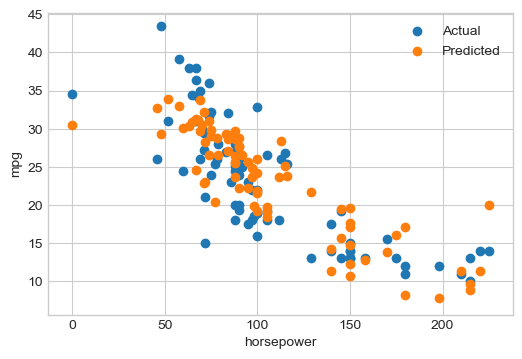

    weight corr coeff: -0.83


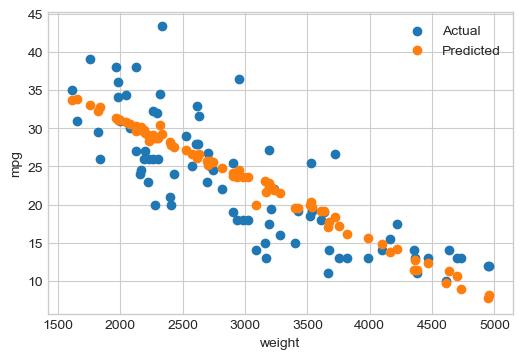

displacement corr coeff: -0.80


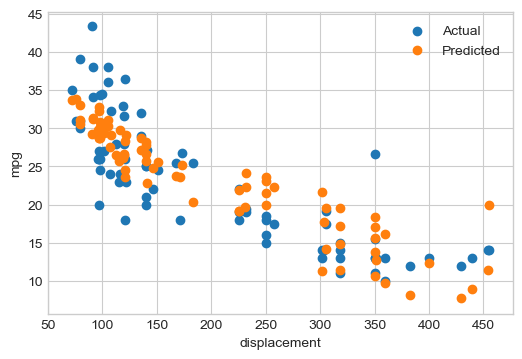

In [49]:
for col in features.columns:
    print(f"{col: >10} corr coeff: {np.corrcoef(features[col],target)[0][1]:>5.2f}")
    plt.figure(dpi=100)
    plt.scatter(x_test[col],y_test,label='Actual')
    plt.scatter(x_test[col],pred,label='Predicted')
    plt.xlabel(col)
    plt.ylabel('mpg')
    plt.legend()
    plt.show()

In [54]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [53]:
model.predict([[130,3504,307]])[0]

19.339491125883686

__6. SAVING MODEL__

In [56]:
import pickle 


In [58]:
fp=open('Mileage.pkl','wb')

In [59]:
pickle.dump(model,fp)

In [61]:
fp.close()

In [63]:
pwd #location where model saved

'C:\\Users\\Deepali Verma\\Desktop\\DataScience files,books,assignments\\26-06-20'

*Work done Without using Standard Scaling

                                         _________THANK YOU_________________